In [31]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' # used to make plots look nicer

# Problem 3

In [32]:
# Initialize model
dm = em.Model(2,3)
nodes = dm.nodes
n = dm.dnodes

# Define section properties
A = 1
Iab = 200000
Ic  = 300000
xs1 = dm.xsec('ab', A, Iab)
xs2 = dm.xsec('c', A, Ic)

xsecs = [xs1, xs1, xs2] 

# Define nodes
dm.node('1', 0.0, 0.0)
dm.node('2', 15., 0.0)
dm.node('3', 35., 0.0)
dm.node('4', 50., 0.0)

# Create beams
a, b, c = dm.girder(nodes, xsecs=xsecs)


# Establish fixities
dm.fix(n['1'], ['x','y'])
dm.fix(n['2'], ['y'])
dm.fix(n['3'], ['y'])
dm.fix(n['4'], ['y'])

# uncomment line below to automatically print FEDEASLab input script
# em.utilities.export.FEDEAS(dm)

dm.numDOF() # automatically number dofs and print them as list

[[8, 9, 1], [2, 10, 3], [4, 11, 5], [6, 12, 7]]

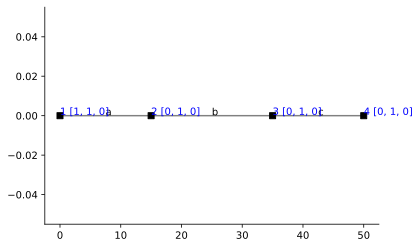

In [33]:
fig, ax = plt.subplots()
em.plot_beam(dm, ax)

## Part a) Distributed Loading

### Determine displacements of the free dofs.

In [34]:
# set element loads
a.w['y'] = -10
b.w['y'] = -10

In [35]:
A = em.A_matrix(dm)
B = em.B_matrix(dm)
V0 = em.V_vector(A).o

In [36]:
Q0 = em.Q_vector(B).o
Q0

,$Q_{{}}$
$a_1$,0.000000
$a_2$,187.500000
$a_3$,-187.500000
$b_1$,0.000000
$b_2$,333.333333
$b_3$,-333.333333
$c_1$,0.000000
$c_2$,0.000000
$c_3$,0.000000


In [37]:
P0 = B.f@Q0
P0

,$P_{{}}$
$1$,187.500000
$2$,0.000000
$3$,145.833333
$4$,0.000000
$5$,-333.333333
$6$,0.000000
$7$,0.000000


In [38]:
K = em.K_matrix(dm)
K.f

,$U_{{1}}$,$U_{{2}}$,$U_{{3}}$,$U_{{4}}$,$U_{{5}}$,$U_{{6}}$,$U_{{7}}$
$P_{{1}}$,53333.333333,0.000000,26666.666667,0.000000,0.0,0.000000,0.0
$P_{{2}}$,0.000000,0.116667,0.000000,-0.050000,0.0,0.000000,0.0
$P_{{3}}$,26666.666667,0.000000,93333.333333,0.000000,20000.0,0.000000,0.0
$P_{{4}}$,0.000000,-0.050000,0.000000,0.116667,0.0,-0.066667,0.0
$P_{{5}}$,0.000000,0.000000,20000.000000,0.000000,120000.0,0.000000,40000.0
$P_{{6}}$,0.000000,0.000000,0.000000,-0.066667,0.0,0.066667,0.0
$P_{{7}}$,0.000000,0.000000,0.000000,0.000000,40000.0,0.000000,80000.0


In [39]:
Uf = K.f.inv@(-P0)
Uf

,$U_{{}}$
$U_{{1}}$,-0.002734
$U_{{2}}$,0.000000
$U_{{3}}$,-0.001562
$U_{{4}}$,0.000000
$U_{{5}}$,0.003646
$U_{{6}}$,0.000000
$U_{{7}}$,-0.001823


### Determine element basic forces

In [40]:
V = A.f@Uf
V

,$V_{{}}$
$a_1$,0.000000
$a_2$,-0.002734
$a_3$,-0.001562
$b_1$,0.000000
$b_2$,-0.001562
$b_3$,0.003646
$c_1$,0.000000
$c_2$,0.003646
$c_3$,-0.001823


In [41]:
Q = K.s@ V+Q0
Q

,0
0,0.000000e+00
1,2.842171e-14
2,-3.437500e+02
3,0.000000e+00
4,3.437500e+02
5,-2.187500e+02
6,0.000000e+00
7,2.187500e+02
8,2.842171e-14


## Part b) Thermal Loading

In [42]:
a.w['y'] = 0.0
b.w['y'] = 0.0
b.e0['2'] = -1e-3
b.e0['3'] =  1e-3
c.e0['2'] = -1e-3
c.e0['3'] =  1e-3

In [43]:
V0 = em.V_vector(A).o
V0

,$V_{{0}}$
$a_1$,0.0000
$a_2$,0.0000
$a_3$,0.0000
$b_1$,0.0000
$b_2$,0.0100
$b_3$,-0.0100
$c_1$,0.0000
$c_2$,0.0075
$c_3$,-0.0075


In [44]:
Q0 = em.Q_vector(B).o
Q0

,$Q_{{}}$
$a_1$,0.0
$a_2$,0.0
$a_3$,0.0
$b_1$,0.0
$b_2$,-200.0
$b_3$,200.0
$c_1$,0.0
$c_2$,-300.0
$c_3$,300.0


In [45]:
c.f_matrix()

,$q_1$,$q_2$,$q_3$
$v_1$,15.0,0.000000,0.000000
$v_2$,0.0,0.000017,-0.000008
$v_3$,0.0,-0.000008,0.000017
